In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [17]:
#X = np.linspace(0, 10, 100)
#y = np.sin(X) + np.random.normal(0, 0.1, 100)
#X = X.reshape(-1, 1)

In [19]:
def gaussian_kernel(x, X, tau):
    return np.exp(-cdist([[x]], X, 'sqeuclidean') / (2 * tau ** 2))

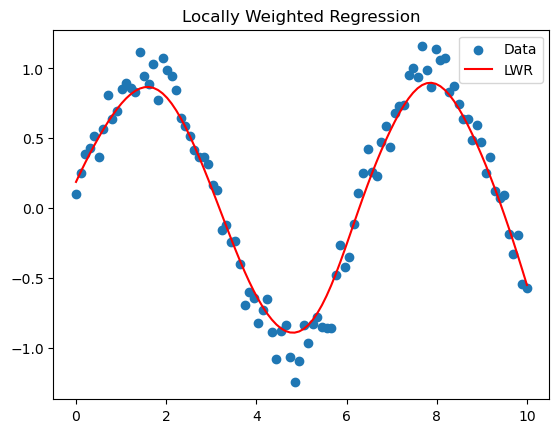

In [21]:
def locally_weighted_regression(X_train, y_train, tau=0.5):
    X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    y_pred = []
    for x in X_range:
        x_vec = np.array([1, x])
        weights = gaussian_kernel(x, X_train, tau).flatten()
        W = np.diag(weights)
        theta = np.linalg.pinv(X_train_bias.T @ W @ X_train_bias) @ (X_train_bias.T @ W @ y_train)
        y_pred.append(x_vec @ theta)
    plt.scatter(X_train[:, 0], y_train, label='Data')
    plt.plot(X_range, y_pred, color='red', label='LWR')
    plt.title("Locally Weighted Regression")
    plt.legend()
    plt.show()

locally_weighted_regression(X, y)